# Advanced Learning
## Text Mining : Opinion Analysis

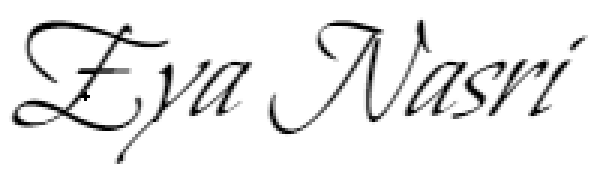

One of the most important topics nowadays , loads of people are wondering if the earth is flat or round and in order to know what the most popular opinion and what the internauts think about it we decided to make an explanatory text mining using this approach :

## GATHERING PHASE :

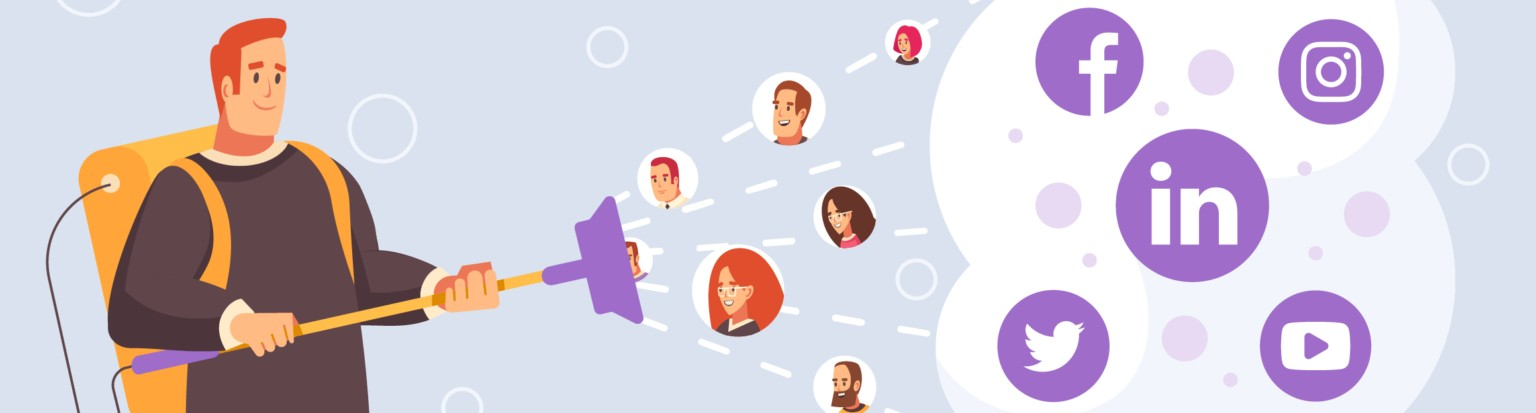

To colect data and users opinion we made a web scrapp using python script and ParseHub on Reddit , Youtube , Facebook and twitter with the Flat or round posts comments , so we gadhered over 2K comment on this matter .

In [50]:
#librairie pandas
import pandas
import numpy
import matplotlib.pyplot as plt
#version
print(pandas.__version__) # 0.23.0
#chargement de la première feuille de données
fi = open('flatorround.txt', 'r', encoding='utf-8')
data = fi.read().rstrip()
fi.close
print(data)

1.4.2
Steven Koko
if I use a pen to write my will. Was it the pen who gets credit or me who used the pen?
God used His prophets to write His will. Isiah 44:22 And Him who sits above the sphere/circle of The Earth … who stretches out the heavens. … See more
Reply15 wEdited
Steven Koko
Because God made it a sphere as it is written in Scripture ￼￼￼.
Reply15 w
Joshua Niday
Two words: Google Earth 🌎
Reply16 w
Nuno Leitão
You couldn't see Spain, because Spain has very little coast towards the Atlantic ocean.
You could see the great nation of Portugal though.
Reply1 y
Brendan Whitefield
Only Americans believe the earth is flat. Go figure!
Reply1 y
Lindsay McBryan
I physically cannot believe that in 2021 (or I guess 2020 when this was made) we have to have three major science communicators make a video telling us why the earth is round.

Reply1 y
James McClendon
I’m totally astounded by the stupidity of people, I need to move to a mountaintop and get off the grid just to stay away from the nut

## PREPROCESS PHASE :

In [51]:
import re
data=re.sub("[^a-zA-Z]"," ",  str(data))
print(data)

Steven Koko if I use a pen to write my will  Was it the pen who gets credit or me who used the pen  God used His prophets to write His will  Isiah       And Him who sits above the sphere circle of The Earth   who stretches out the heavens    See more Reply   wEdited Steven Koko Because God made it a sphere as it is written in Scripture      Reply   w Joshua Niday Two words  Google Earth   Reply   w Nuno Leit o You couldn t see Spain  because Spain has very little coast towards the Atlantic ocean  You could see the great nation of Portugal though  Reply  y Brendan Whitefield Only Americans believe the earth is flat  Go figure  Reply  y Lindsay McBryan I physically cannot believe that in       or I guess      when this was made  we have to have three major science communicators make a video telling us why the earth is round   Reply  y James McClendon I m totally astounded by the stupidity of people  I need to move to a mountaintop and get off the grid just to stay away from the nuttiness

In [52]:
data = data.replace('reply', '')
data = data.replace('il', '')
data = data.replace('ans', '')
data = data.replace('mois', '')
data = data.replace('day', '')
data = data.replace('make', '')
data = data.replace('could', '')
data = data.replace('Reply', '')
data = data.replace('il y a', '')
data = data.replace('an', '')
data = data.replace('wl', '')
data = data.replace('like', '')


In [53]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

wordss=stopwords.words('english')
print(wordss)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\eyanasri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
f=data.lower()
print(f)

steven koko if i use a pen to write my   was it the pen who gets credit or me who used the pen  god used his prophets to write his   isiah       and him who sits above the sphere circle of the earth   who stretches out the heavens    see more    wedited steven koko because god made it a sphere as it is written in scripture         w joshua ni two words  google earth      w nuno leit o you n t see spain  because spain has very little coast towards the atltic oce  you  see the great nation of portugal though    y brend whitefield only americ believe the earth is flat  go figure    y lindsay mcbry i physically cnot believe that in       or i guess      when this was made  we have to have three major science communicators  a video telling us why the earth is round     y james mcclendon i m totally astounded by the stupidity of people  i need to move to a mountaintop d get off the grid just to stay away from the nuttiness that s out there    y marco bruno i simply c not believe we re talkin

In [55]:
from string import digits
f1 = ''.join([i for i in f if not i.isdigit()])
print(f1)

steven koko if i use a pen to write my   was it the pen who gets credit or me who used the pen  god used his prophets to write his   isiah       and him who sits above the sphere circle of the earth   who stretches out the heavens    see more    wedited steven koko because god made it a sphere as it is written in scripture         w joshua ni two words  google earth      w nuno leit o you n t see spain  because spain has very little coast towards the atltic oce  you  see the great nation of portugal though    y brend whitefield only americ believe the earth is flat  go figure    y lindsay mcbry i physically cnot believe that in       or i guess      when this was made  we have to have three major science communicators  a video telling us why the earth is round     y james mcclendon i m totally astounded by the stupidity of people  i need to move to a mountaintop d get off the grid just to stay away from the nuttiness that s out there    y marco bruno i simply c not believe we re talkin

In [56]:
import re
words =  re.sub('\W+',' ', f1 )
print(words)

steven koko if i use a pen to write my was it the pen who gets credit or me who used the pen god used his prophets to write his isiah and him who sits above the sphere circle of the earth who stretches out the heavens see more wedited steven koko because god made it a sphere as it is written in scripture w joshua ni two words google earth w nuno leit o you n t see spain because spain has very little coast towards the atltic oce you see the great nation of portugal though y brend whitefield only americ believe the earth is flat go figure y lindsay mcbry i physically cnot believe that in or i guess when this was made we have to have three major science communicators a video telling us why the earth is round y james mcclendon i m totally astounded by the stupidity of people i need to move to a mountaintop d get off the grid just to stay away from the nuttiness that s out there y marco bruno i simply c not believe we re talking about something that was resolved my hundreds of years ago tot

<>:2: DeprecationWarning: invalid escape sequence \W
<>:2: DeprecationWarning: invalid escape sequence \W
C:\Users\eyanasri\AppData\Local\Temp\ipykernel_11832\3636005631.py:2: DeprecationWarning: invalid escape sequence \W
  words =  re.sub('\W+',' ', f1 )


## INDEX PHASE :

In [57]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image

In [58]:
mask = np.array(Image.open(r'C:\Users\eyanasri\Desktop\circle.png'))


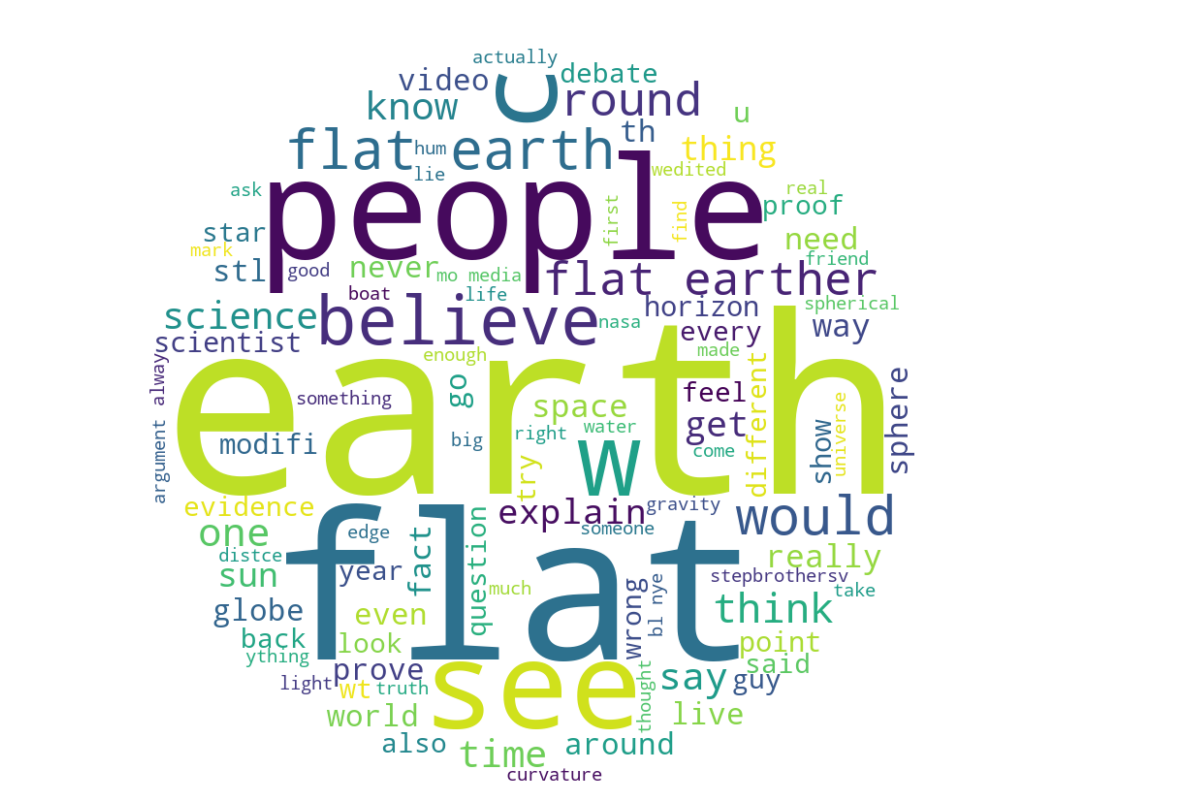

In [59]:
exclure_mots = wordss
mask = np.array(Image.open(r'C:\Users\eyanasri\Desktop\circle.png'))
wc = WordCloud(stopwords=exclure_mots,
               mask=mask, background_color="white",
               max_words=100, max_font_size=800,
               random_state=80, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(words)
plt.figure(figsize=[21,21])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [60]:
print(words.count("round"))

183


In [61]:
words.count("flat")

524

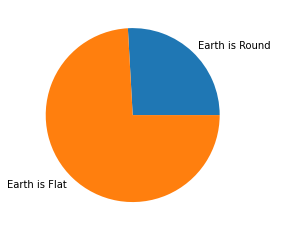

In [62]:
import matplotlib.pyplot as plt
import numpy as np

r=words.count("round")
f=words.count("flat")
y = np.array([r, f])
mylabels = ["Earth is Round ", "Earth is Flat"]

plt.pie(y, labels = mylabels)
plt.show() 

## MINING PHASE :

### LSI : latent semantic indexing

In [63]:
#import modules
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import os
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from string import digits

In [64]:

# Load Dataset
documents_list = []
documents_LDA = []

with open( os.path.join("flatorround.txt") ,"r",  encoding='utf-8') as fin:
    for line in fin.readlines():
        text = line.strip()
        text = ''.join([i for i in text if not i.isdigit()])
        text = text.replace('like', '')
        text = text.replace('Reply', '')
        text = text.replace('mois', '')
        text = text.replace('an', '')
        text = text.replace('modifié', '')
        text = text.replace('semaines', '')
        text = text.replace('y', '')
        text = text.replace('jours', '')
        text = text.replace('il', '')
        text = text.replace('ou', '')
        text = text.replace('dt', '')
        text = text.replace('w', '')
    

        documents_list.append(text)
        documents_LDA.append(documents_list)

In [65]:
# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')
# Vectorize document using TF-IDF
tfidf = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

# Fit and Transform the documents
train_data = tfidf.fit_transform(documents_list)   
# Define the number of topics or components
num_components=10

# Create SVD object
lsa = TruncatedSVD(n_components=num_components, n_iter=100, random_state=42)

# Fit SVD model on data
lsa.fit_transform(train_data)

# Get Singular values and Components 
Sigma = lsa.singular_values_ 
V_transpose = lsa.components_.T
# Print the topics with their terms
terms = tfidf.get_feature_names()

for index, component in enumerate(lsa.components_):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:5]
    top_terms_list=list(dict(top_terms_key).keys())
    print("Topic "+str(index)+": ",top_terms_list)

Topic 0:  ['s', 'flat', 'earth', 'd', 't']
Topic 1:  ['flat', 'earth', 'd', 't', 'c']
Topic 2:  ['edited', 'earth', 'flat', 'scott', 'wallace']
Topic 3:  ['stepbrothersv', 'edited', 'l', 'predrag', 'd']
Topic 4:  ['flat', 'earth', 'earther', 'fisherm', 'spherical']
Topic 5:  ['mo', 'media', 'helicopter', 'earth', 'ldn']
Topic 6:  ['l', 'predrag', 'appel', 'du', 'vide']
Topic 7:  ['c', 'james', 'rev', 't', 'mikeiththebluecar']
Topic 8:  ['mikeiththebluecar', 't', 'old', 'ho', 'earth']
Topic 9:  ['t', 'don', 'isn', 'doesn', 'roce']


C:\Users\eyanasri\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### LDA : latent Dirichlet allocation.

In [66]:
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')

# create English stop words list
en_stop = get_stop_words('en')

# Create p_stemmer of class PorterStemmer
p_stemmer = PorterStemmer()
    
# compile sample documents into a list
doc_set = documents_list

# list for tokenized documents in loop
texts = []

# loop through document list
for i in doc_set:
    
    # clean and tokenize document string
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    # stem tokens
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    
    # add tokens to list
    texts.append(stemmed_tokens)

# turn our tokenized documents into a id <-> term dictionary
dictionary = corpora.Dictionary(texts)
    
# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in texts]

# generate LDA model
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=2, id2word = dictionary, passes=20)

In [67]:
print(ldamodel.print_topics())


[(0, '0.033*"d" + 0.025*"earth" + 0.024*"flat" + 0.024*"s" + 0.020*"t" + 0.011*"ho" + 0.010*"peopl" + 0.010*"see" + 0.010*"c" + 0.010*"ith"'), (1, '0.005*"john" + 0.004*"dr" + 0.004*"ne" + 0.004*"great" + 0.004*"bc" + 0.003*"columbu" + 0.003*"research" + 0.003*"peter" + 0.003*"degre" + 0.003*"mikeiththebluecar"')]


In [68]:
# Compute Perplexity
from gensim.models import CoherenceModel

print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)



Perplexity:  -7.160480717030327

Coherence Score:  0.6414595521508424


## ANALYSIS PHASE :

In [69]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(ldamodel, corpus, dictionary)
vis

C:\Users\eyanasri\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
0      0.180783  0.0       1        1  84.275556
1     -0.180783  0.0       2        1  15.724444, topic_info=           Term        Freq       Total Category  logprob  loglift
75            d  609.000000  609.000000  Default  30.0000  30.0000
11        earth  468.000000  468.000000  Default  29.0000  29.0000
50         flat  452.000000  452.000000  Default  28.0000  28.0000
83            s  448.000000  448.000000  Default  27.0000  27.0000
20            t  374.000000  374.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
1264   research   10.414392   19.541718   Topic2  -5.8120   1.2206
214          ne   13.774702   58.010988   Topic2  -5.5324   0.4122
2581  hemispher    7.689704   23.471380   Topic2  -6.1154   0.7341
2583     sthern    6.892930   16.421577   Topic2  -6.2247   0.9819
135        star    6.785434   35.683393   Topic2  -6.2405   0.1900

[103 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1249      2  0.859829      ad
2048      1  0.118119  africa
2048      2  0.944955  africa
47        1  0.096118    amer
47        2  0.961182    amer
...     ...       ...     ...
891       2  0.846002       v
752       2  0.978042  wallac
2949      2  0.949039  ᴄᴏꜱᴍɪメ
2276      2  0.972590       ị
2950      2  0.949039  ꜰɪɴɪᴛʏ

[94 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2])